<a href="https://colab.research.google.com/github/9289311329ankit-sketch/Machine-learning-/blob/main/Copy_of_Experiment_3(Logistic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

import pandas as pd
df = pd.read_csv('/content/spam.csv') #write your own file path
print (df.head())






  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
#df.shape
import pandas as pd
df = pd.read_csv('/content/spam.csv')
print(df.shape)


(5572, 2)


In [ ]:
#check null values
import pandas as pd
df = pd.read_csv('/content/spam.csv')
df.isnull().sum()



,0
Category,0
Message,0


In [ ]:

import pandas as pd
df = pd.read_csv('/content/spam.csv')

df.drop_duplicates(inplace=True)


print("Data shape after removing duplicates:", df.shape)

print("Remaining duplicate rows:", df.duplicated().sum())


Data shape after removing duplicates: (5157, 2)
Remaining duplicate rows: 0


In [ ]:
#now it should be false
import pandas as pd
df = pd.read_csv('/content/spam.csv')
df.duplicated().any()


np.True_

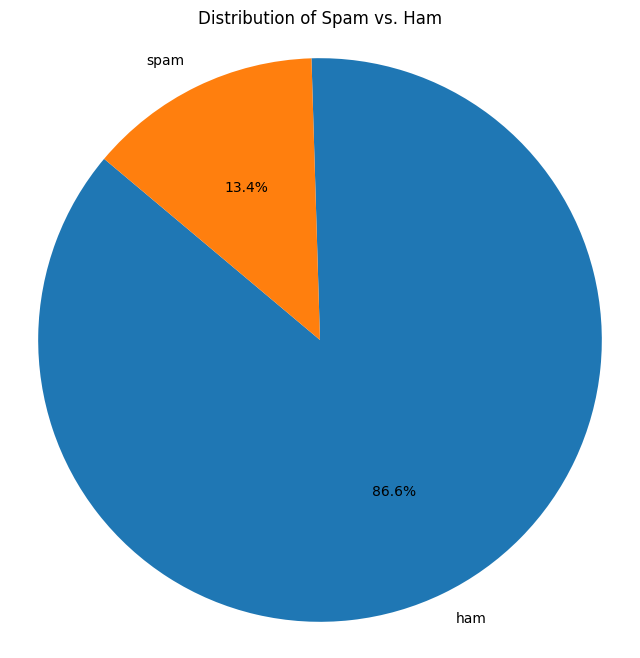

In [ ]:
# Calculate the count of each label
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/spam.csv')
category_counts = df['Category'].value_counts()


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

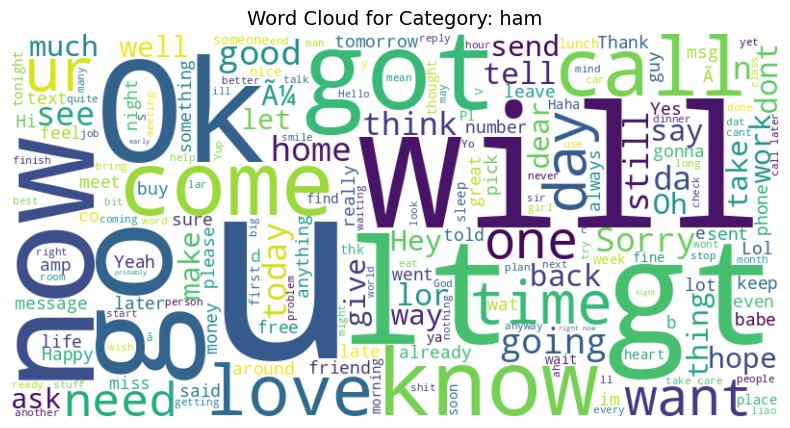

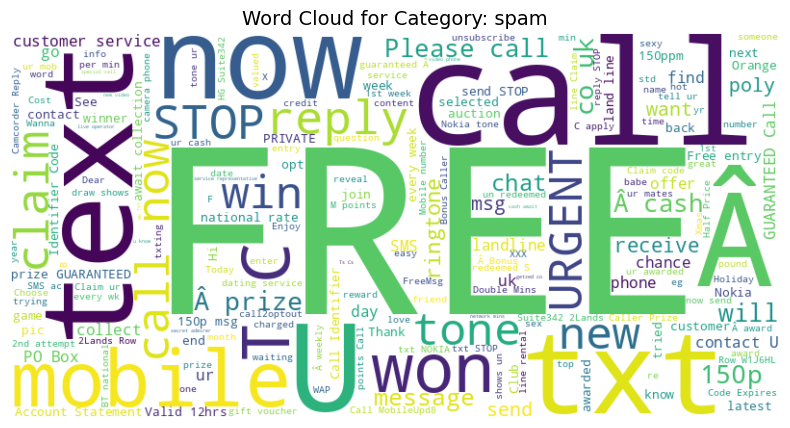

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category]
    text = ' '.join(filtered_df['Message'].astype(str))

    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}', fontsize=14)
    plt.axis('off')
    plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


# Many spam datasets don’t have headers, so we add them manually
df = pd.read_csv("/content/spam.csv", encoding="latin-1", header=None)

df = df.rename(columns={0: 'Category', 1: 'Message'})[['Category', 'Message']]

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

print(df.head())
print(df['Category'].value_counts())  # shows encoded counts


   Category                                            Message
0         0                                            Message
1         1  Go until jurong point, crazy.. Available only ...
2         1                      Ok lar... Joking wif u oni...
3         2  Free entry in 2 a wkly comp to win FA Cup fina...
4         1  U dun say so early hor... U c already then say...
Category
1    4825
2     747
0       1
Name: count, dtype: int64


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



No messages to generate word cloud for category: 0
No messages to generate word cloud for category: 236
No messages to generate word cloud for category: 3184
No messages to generate word cloud for category: 4852
No messages to generate word cloud for category: 3848
No messages to generate word cloud for category: 602
No messages to generate word cloud for category: 4577
No messages to generate word cloud for category: 1591
No messages to generate word cloud for category: 1243
No messages to generate word cloud for category: 5071
No messages to generate word cloud for category: 4882
No messages to generate word cloud for category: 461
No messages to generate word cloud for category: 4623
No messages to generate word cloud for category: 4663
No messages to generate word cloud for category: 2460
No messages to generate word cloud for category: 2074
No messages to generate word cloud for category: 4697
No messages to generate word cloud for category: 3110
No messages to generate word cloud

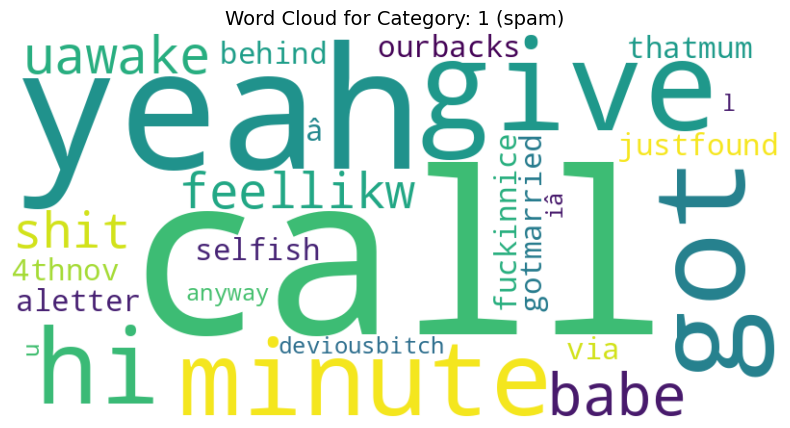

No messages to generate word cloud for category: 1157
No messages to generate word cloud for category: 1099
No messages to generate word cloud for category: 1863
No messages to generate word cloud for category: 3565
No messages to generate word cloud for category: 3272
No messages to generate word cloud for category: 254
No messages to generate word cloud for category: 2362
No messages to generate word cloud for category: 4060
No messages to generate word cloud for category: 789
No messages to generate word cloud for category: 594
No messages to generate word cloud for category: 1668
No messages to generate word cloud for category: 351
No messages to generate word cloud for category: 2698
No messages to generate word cloud for category: 1312
No messages to generate word cloud for category: 3554
No messages to generate word cloud for category: 4647
No messages to generate word cloud for category: 34
No messages to generate word cloud for category: 50
No messages to generate word cloud f

In [20]:
# Convert 'Text' column to lowercase

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the spam dataset (tab-separated)
df = pd.read_csv("/content/spam.csv", sep='\t', header=None, names=['Category', 'Message'], encoding='latin-1')

# Step 2: Encode Category (ham=0, spam=1)
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Step 3: Convert 'Message' column to lowercase and replace NaNs
df['Message'] = df['Message'].fillna('').str.lower()

# Step 4: Generate word clouds safely
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category]
    text = ' '.join(filtered_df['Message'].astype(str)).strip()

    # Skip if no text
    if len(text) == 0:
        print(f"No messages to generate word cloud for category: {category}")
        continue

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category} ({ "ham" if category == 0 else "spam" })', fontsize=14)
    plt.axis('off')
    plt.show()


In [21]:


# Remove extra white spaces from the 'Text' column
import pandas as pd

# Example: load CSV
df = pd.read_csv("/content/spam.csv", sep='\t', header=None, names=['Category', 'Message'], encoding='latin-1')

# Convert messages to string and remove extra spaces
df['Message'] = df['Message'].astype(str).str.strip()          # remove leading/trailing spaces
df['Message'] = df['Message'].str.replace(r'\s+', ' ', regex=True)  # replace multiple spaces with a single space

# Check result
print(df.head())





                                            Category Message
0                                   Category,Message     nan
1  ham,"Go until jurong point, crazy.. Available ...     nan
2                  ham,Ok lar... Joking wif u oni...     nan
3  spam,Free entry in 2 a wkly comp to win FA Cup...     nan
4  ham,U dun say so early hor... U c already then...     nan


In [22]:
# Function to remove HTML tags from text
# Remove HTML tags from 'Text' column
import re
import pandas as pd

# Sample DataFrame
# df = pd.read_csv("/content/spam.csv", sep='\t', header=None, names=['Category', 'Message'], encoding='latin-1')

# Function to remove HTML tags
def remove_html_tags(text):
    if not isinstance(text, str):
        return ''  # handle NaN or non-string values
    clean_text = re.sub(r'<.*?>', '', text)  # remove anything between <...>
    return clean_text

# Apply function to 'Message' column
df['Message'] = df['Message'].apply(remove_html_tags)

# Check result
print(df.head())


                                            Category Message
0                                   Category,Message     nan
1  ham,"Go until jurong point, crazy.. Available ...     nan
2                  ham,Ok lar... Joking wif u oni...     nan
3  spam,Free entry in 2 a wkly comp to win FA Cup...     nan
4  ham,U dun say so early hor... U c already then...     nan


In [23]:


# Define a function to remove URLs using regular expressions
# Apply the function to the 'Text' column
import re
import pandas as pd

# Sample DataFrame
# df = pd.read_csv("/content/spam.csv", sep='\t', header=None, names=['Category', 'Message'], encoding='latin-1')

# Function to remove URLs
def remove_urls(text):
    if not isinstance(text, str):
        return ''  # handle NaN or non-string values
    # Remove http, https, www links
    clean_text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_urls)

# Check result
print(df.head())





                                            Category Message
0                                   Category,Message     nan
1  ham,"Go until jurong point, crazy.. Available ...     nan
2                  ham,Ok lar... Joking wif u oni...     nan
3  spam,Free entry in 2 a wkly comp to win FA Cup...     nan
4  ham,U dun say so early hor... U c already then...     nan


In [24]:
  # Define the pattern to match special character
# Apply the function to the 'Message' column
import re
import pandas as pd

# Function to remove special characters
def remove_special_characters(text):
    if not isinstance(text, str):
        return ''  # handle NaN or non-string values
    # Remove everything except letters, numbers, and spaces
    clean_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

# Check result
print(df.head())






                                            Category Message
0                                   Category,Message     nan
1  ham,"Go until jurong point, crazy.. Available ...     nan
2                  ham,Ok lar... Joking wif u oni...     nan
3  spam,Free entry in 2 a wkly comp to win FA Cup...     nan
4  ham,U dun say so early hor... U c already then...     nan


In [25]:
# Function to remove numeric values from text
# Apply the function to the "Message" column
import re
import pandas as pd

# Function to remove numeric values
def remove_numeric(text):
    if not isinstance(text, str):
        return ''  # handle NaN or non-string values
    # Remove all digits
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_numeric)

# Check result
print(df.head())


                                            Category Message
0                                   Category,Message     nan
1  ham,"Go until jurong point, crazy.. Available ...     nan
2                  ham,Ok lar... Joking wif u oni...     nan
3  spam,Free entry in 2 a wkly comp to win FA Cup...     nan
4  ham,U dun say so early hor... U c already then...     nan


In [26]:

# Define a function to remove non-alphanumeric character
# Apply the function to the "Message" column

import re
import pandas as pd

# Function to remove non-alphanumeric characters (keep letters and numbers only)
def remove_non_alphanumeric(text):
    if not isinstance(text, str):
        return ''  # handle NaN or non-string values
    # Remove everything except letters and numbers
    clean_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

# Check result
print(df.head())




                                            Category Message
0                                   Category,Message     nan
1  ham,"Go until jurong point, crazy.. Available ...     nan
2                  ham,Ok lar... Joking wif u oni...     nan
3  spam,Free entry in 2 a wkly comp to win FA Cup...     nan
4  ham,U dun say so early hor... U c already then...     nan


In [27]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}
import pandas as pd

# Sample DataFrame
# df = pd.read_csv("/content/spam.csv", sep='\t', header=None, names=['Category', 'Message'], encoding='latin-1')

# Function to replace chat abbreviations
def replace_chat_words(text):
    if not isinstance(text, str):
        return ''
    # Split text into words
    words = text.split()
    # Replace each word if it exists in chat_words
    replaced_words = [chat_words.get(word.upper(), word) for word in words]
    # Join back into a string
    return ' '.join(replaced_words)

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(replace_chat_words)

# Check the result
print(df.head())


                                            Category Message
0                                   Category,Message     nan
1  ham,"Go until jurong point, crazy.. Available ...     nan
2                  ham,Ok lar... Joking wif u oni...     nan
3  spam,Free entry in 2 a wkly comp to win FA Cup...     nan
4  ham,U dun say so early hor... U c already then...     nan


No messages to generate word cloud for category: 0
No messages to generate word cloud for category: 236
No messages to generate word cloud for category: 3184
No messages to generate word cloud for category: 4852
No messages to generate word cloud for category: 3848
No messages to generate word cloud for category: 602
No messages to generate word cloud for category: 4577
No messages to generate word cloud for category: 1591
No messages to generate word cloud for category: 1243
No messages to generate word cloud for category: 5071
No messages to generate word cloud for category: 4882
No messages to generate word cloud for category: 461
No messages to generate word cloud for category: 4623
No messages to generate word cloud for category: 4663
No messages to generate word cloud for category: 2460
No messages to generate word cloud for category: 2074
No messages to generate word cloud for category: 4697
No messages to generate word cloud for category: 3110
No messages to generate word cloud

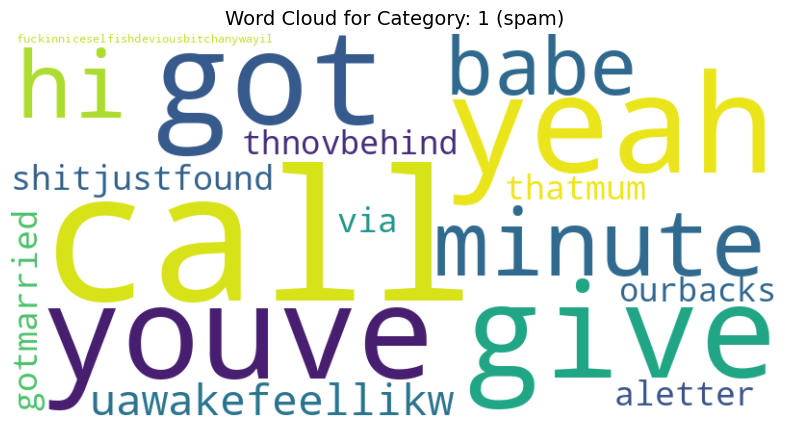

No messages to generate word cloud for category: 1157
No messages to generate word cloud for category: 1099
No messages to generate word cloud for category: 1863
No messages to generate word cloud for category: 3565
No messages to generate word cloud for category: 3272
No messages to generate word cloud for category: 254
No messages to generate word cloud for category: 2362
No messages to generate word cloud for category: 4060
No messages to generate word cloud for category: 789
No messages to generate word cloud for category: 594
No messages to generate word cloud for category: 1668
No messages to generate word cloud for category: 351
No messages to generate word cloud for category: 2698
No messages to generate word cloud for category: 1312
No messages to generate word cloud for category: 3554
No messages to generate word cloud for category: 4647
No messages to generate word cloud for category: 34
No messages to generate word cloud for category: 50
No messages to generate word cloud f

In [29]:


# Function to replace chat words with their full forms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import re

# Step 1: Load the spam dataset (tab-separated)
df = pd.read_csv("/content/spam.csv", sep='\t', header=None, names=['Category', 'Message'], encoding='latin-1')

# Step 2: Encode Category (ham=0, spam=1)
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Step 3: Define chat words dictionary
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "LOL": "Laughing Out Loud",
    "BRB": "Be Right Back",
    "TTYL": "Talk To You Later",
    "U": "You",
    "UR": "Your",
    "BTW": "By The Way",
    # ... add all other chat words here
}

# Step 4: Define text cleaning functions
def remove_html_tags(text):
    if not isinstance(text, str):
        return ''
    return re.sub(r'<.*?>', '', text)

def remove_urls(text):
    if not isinstance(text, str):
        return ''
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_special_characters(text):
    if not isinstance(text, str):
        return ''
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

def remove_numeric(text):
    if not isinstance(text, str):
        return ''
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    if not isinstance(text, str):
        return ''
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

def replace_chat_words(text):
    if not isinstance(text, str):
        return ''
    words = text.split()
    replaced_words = [chat_words.get(word.upper(), word) for word in words]
    return ' '.join(replaced_words)

# Step 5: Apply all cleaning functions
df['Message'] = df['Message'].apply(remove_html_tags)
df['Message'] = df['Message'].apply(remove_urls)
df['Message'] = df['Message'].apply(remove_special_characters)
df['Message'] = df['Message'].apply(remove_numeric)
df['Message'] = df['Message'].apply(remove_extra_whitespace)
df['Message'] = df['Message'].str.lower()  # lowercase
df['Message'] = df['Message'].apply(replace_chat_words)

# Step 6: Generate word clouds for each category
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category]
    text = ' '.join(filtered_df['Message']).strip()

    if len(text) == 0:
        print(f"No messages to generate word cloud for category: {category}")
        continue

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category} ({ "ham" if category == 0 else "spam" })', fontsize=14)
    plt.axis('off')
    plt.show()



In [30]:


# Download NLTK stopwords corpus
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords corpus
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    if not isinstance(text, str):
        return ''
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply function to 'Message' column
df['Message'] = df['Message'].apply(remove_stopwords)

# Check result
print(df.head())


   Category Message
0         0        
1       236        
2      3184        
3      4852        
4      3848        


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
# Initialize the Porter Stemmer
import pandas as pd
from nltk.stem import PorterStemmer
import nltk

# Download punkt tokenizer if not already done
nltk.download('punkt')

# Initialize Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming to each word in the 'Message' column
df['Message_stemmed'] = df['Message'].apply(
    lambda x: ' '.join([porter_stemmer.stem(word) for word in str(x).split()])
)

# Check the result
print(df.head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   Category Message Message_stemmed
0         0                        
1       236                        
2      3184                        
3      4852                        
4      3848                        


In [35]:
#Convert text to numbers using bag of words
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df['Message_stemmed'] and df['Category'] already exist

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the stemmed messages to create BoW features
X = vectorizer.fit_transform(df['Message_stemmed']).toarray()

# Target labels
y = df['Category']

# Check shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)



Feature matrix shape: (5575, 17)
Target vector shape: (5575,)


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Solve this problem using Logistic Regression(using numpy from scratch)

In [36]:

# Step 0: Install necessary libraries (if not already)
!pip install nltk emoji

# Step 1: Import libraries
import pandas as pd
import numpy as np
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 2: Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Step 3: Load dataset
df = pd.read_csv("/content/spam.csv", sep='\t', header=None, names=['Category', 'Message'], encoding='latin-1')

# Step 4: Encode category (ham=0, spam=1)
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Step 5: Chat word dictionary
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "LOL": "Laughing Out Loud",
    "BRB": "Be Right Back",
    "TTYL": "Talk To You Later",
    "U": "You",
    "UR": "Your",
    "BTW": "By The Way",
    # Add more chat words as needed
}

# Step 6: Text cleaning functions
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', str(text))

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', str(text), flags=re.MULTILINE)

def remove_emojis(text):
    return emoji.demojize(str(text))

def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', str(text))

def remove_numeric(text):
    return re.sub(r'\d+', '', str(text))

def remove_extra_whitespace(text):
    text = str(text).strip()
    text = re.sub(r'\s+', ' ', text)
    return text

def replace_chat_words(text):
    words = text.split()
    replaced_words = [chat_words.get(word.upper(), word) for word in words]
    return ' '.join(replaced_words)

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Step 7: Initialize stemmer
porter_stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([porter_stemmer.stem(word) for word in text.split()])

# Step 8: Apply all preprocessing steps
df['Message_clean'] = df['Message'].apply(remove_html_tags)\
                                     .apply(remove_urls)\
                                     .apply(remove_emojis)\
                                     .apply(remove_special_characters)\
                                     .apply(remove_numeric)\
                                     .apply(remove_extra_whitespace)\
                                     .str.lower()\
                                     .apply(replace_chat_words)\
                                     .apply(remove_stopwords)\
                                     .apply(stem_text)

# Step 9: Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message_clean']).toarray()
y = df['Category']

# Step 10: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 12: Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.0053811659192825115
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          82       0.00      0.00      0.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [38]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression class
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iters):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Prediction using sigmoid
            y_predicted = sigmoid(linear_model)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_prob = self.predict_proba(X)
        y_pred = np.where(y_prob >= threshold, 1, 0)
        return y_pred

# -------------------------------
# Example usage with your data
# -------------------------------

# Split data manually or reuse previous train/test split
X_train_np = X_train  # BoW train features (NumPy array)
X_test_np = X_test
y_train_np = y_train.to_numpy()  # convert pandas Series to NumPy array
y_test_np = y_test.to_numpy()

# Initialize and train logistic regression
logreg_scratch = LogisticRegressionScratch(lr=0.1, n_iters=1000)
logreg_scratch.fit(X_train_np, y_train_np)

# Make predictions
y_pred_scratch = logreg_scratch.predict(X_test_np)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("=== Logistic Regression (from scratch) ===")
print("Accuracy:", accuracy_score(y_test_np, y_pred_scratch))
print("\nClassification Report:\n", classification_report(y_test_np, y_pred_scratch))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_np, y_pred_scratch))


=== Logistic Regression (from scratch) ===
Accuracy: 0.0008968609865470852

Classification Report:
               precision    recall  f1-score   support

           1       0.00      1.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          82       0.00      0.00  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Now Use sklearn library to fit the data using logistic regression and compare results

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the model
logreg_model.fit(X_train, y_train)

# Step 3: Make predictions on test set
y_pred_logreg = logreg_model.predict(X_test)

# Step 4: Evaluate Logistic Regression
print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# Step 5: Compare with Naive Bayes (if you have already trained it)
from sklearn.metrics import accuracy_score

# Assuming 'y_pred' is from Naive Bayes
print("\n=== Comparison with Naive Bayes ===")
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))


=== Logistic Regression Results ===
Accuracy: 0.0053811659192825115

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          82       0.00      0.00      0.0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
